<h1> Black Friday - Sales Analysis¶


<h1> 1) Quick Insights about the Exploratory Data Analysis(EDA).</h1>

What is Exploratory Data Analysis? Exploratory analysis is done when you are searching for insights from the data using the plots. More details refer the here


In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [231]:
#here we are checking the version of the libraries present.
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.17134-SP0
Python 3.6.7 |Anaconda, Inc.| (default, Dec 10 2018, 20:35:02) [MSC v.1915 64 bit (AMD64)]
NumPy 1.15.4
SciPy 1.1.0
Scikit-Learn 0.21.1


In [200]:
df_raw= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
#View first few records
df_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_raw['Purchase'].describe() #Description of the data sets with Purchase considering as single feature.

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#Look at the data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<h3>We are able to find three different datatypes as</h3>

    2 columns with float64
    5 columns with int64
    5 columns with object

The Data types are classified into two as Quantitative and Categorical Quantitative data takes on numeric values that allow us to perform mathematical operations (like the number of dogs). Categorical are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).
you can referred my slides for more details. <a href= "https://docs.google.com/presentation/d/1eI2ptRHvViE1YoOnBOBFY2GlshvgQbJWNFjIEt9863w/edit?usp=sharing"> Matplotlib Slides.</a>

In [7]:
print(df_raw.shape) #shape tells us about the dataset which consists of how many rows and columns.
df_test.shape

(550068, 12)


(233599, 11)

In [8]:
def display_all(df):   
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df_raw.tail().T)

,550063,550064,550065,550066,550067
User_ID,1006033,1006035,1006036,1006038,1006039
Product_ID,P00372445,P00375436,P00375436,P00375436,P00371644
Gender,M,F,F,F,F
Age,51-55,26-35,26-35,55+,46-50
Occupation,13,1,15,1,0
City_Category,B,C,B,C,B
Stay_In_Current_City_Years,1,3,4+,2,4+
Marital_Status,1,0,1,0,1
Product_Category_1,20,20,20,20,20
Product_Category_2,NaN,NaN,NaN,NaN,NaN


In [10]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068,NaN,NaN,NaN,1.00303e+06,1727.59,1e+06,1.00152e+06,1.00308e+06,1.00448e+06,1.00604e+06
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068,NaN,NaN,NaN,8.07671,6.52266,0,2,7,14,20
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068,NaN,NaN,NaN,0.409653,0.49177,0,0,0,1,1
Product_Category_1,550068,NaN,NaN,NaN,5.40427,3.93621,1,1,5,8,20
Product_Category_2,376430,NaN,NaN,NaN,9.84233,5.08659,2,5,9,15,18


In [11]:
numerical_feats = df_raw.dtypes[df_raw.dtypes != "object"].index  
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_raw.dtypes[df_raw.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [12]:
df_raw.dtypes.describe()

count        12
unique        3
top       int64
freq          5
dtype: object

In [13]:
df_raw.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,True,False


In [14]:
df_raw.isnull().sum().max()

383247

In [15]:
#Insights on NaN values
df_raw.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [16]:
print(df_raw[numerical_feats].columns)
print(df_raw[categorical_feats].columns)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [17]:
%time df_raw[numerical_feats].head()

Wall time: 22.9 ms


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969


In [18]:
df_raw[categorical_feats].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [19]:
df_raw.drop(['Purchase', 'Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)
df_test.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)


In [20]:
df_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,1000001,P00069042,F,0-17,10,A,2,0,3
1,1000001,P00248942,F,0-17,10,A,2,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12
3,1000001,P00085442,F,0-17,10,A,2,0,12
4,1000002,P00285442,M,55+,16,C,4+,0,8


In [21]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,1000004,P00128942,M,46-50,7,B,2,1,1
1,1000009,P00113442,M,26-35,17,C,0,0,3
2,1000010,P00288442,F,36-45,1,B,4+,1,5
3,1000010,P00145342,F,36-45,1,B,4+,1,4
4,1000011,P00053842,F,26-35,1,C,1,0,4


In [26]:
idsUnique= len(set(df_raw.User_ID))
idsTotal= df_raw.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


In [28]:
plt.style.use('fivethirtyeight');
plt.figure(figsize=(14,9));

<Figure size 1008x648 with 0 Axes>

In [38]:
print('skew is:', df_raw.Purchase.skew())
print("Kurtosisis: %f" % df_raw.Purchase.kurt())


skew is: 0.6001400037087128
Kurtosisis: -0.338378


Text(0, 0.5, 'Number of Buyers')

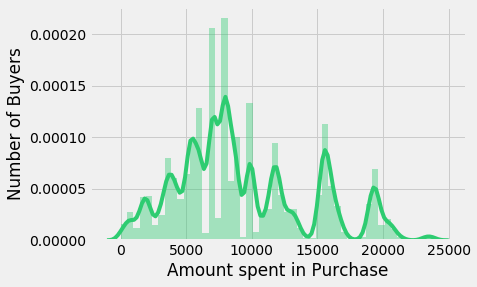

In [41]:
sns.distplot(df_raw['Purchase'],color="#2ecc71");
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")

In [42]:
numerical_feats = df_raw.select_dtypes(include=np.number)
numerical_feats.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [53]:
categorical_feats = df_raw.select_dtypes(include = np.object)
categorical_feats.dtypes

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# 1.1. Univariate Distribution <br>
<b> 1.1.1. Distribution of the target variable : Home Sales Price </b>

In [55]:
df_raw.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<b> 1.1.2.1. Distribution of the Occupation variable. </b>

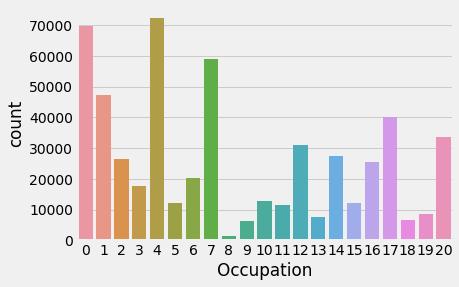

In [56]:
sns.countplot(df_raw.Occupation)


<b> 1.1.2.2. Distribution of the Marital_Status variable </b>

In [57]:
df_raw.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

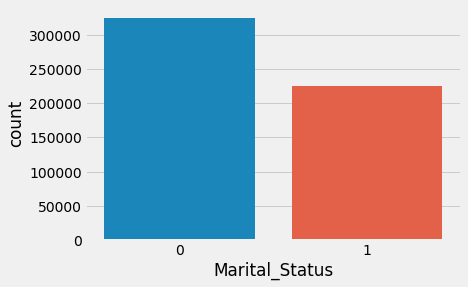

In [58]:
sns.countplot(df_raw.Marital_Status)


<b> 1.1.2.3. Distribution of the Product_Category_1 variable

In [59]:
df_raw.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

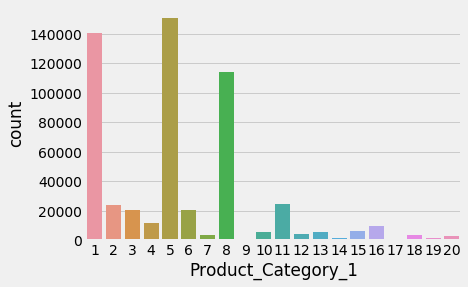

In [60]:
sns.countplot(df_raw.Product_Category_1)


<b> 1.1.2.4. Distribution of the Product_Category_2 variable

In [61]:
df_raw.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

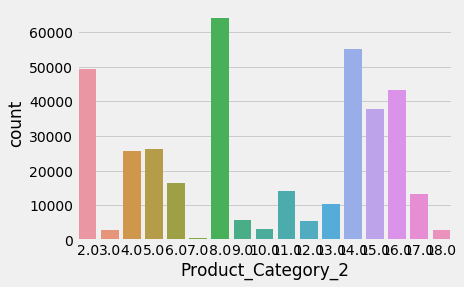

In [63]:
sns.countplot(df_raw.Product_Category_2)


<b> 1.1.2.5. Distribution of the Product_Category_3 variable

In [64]:
df_raw.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

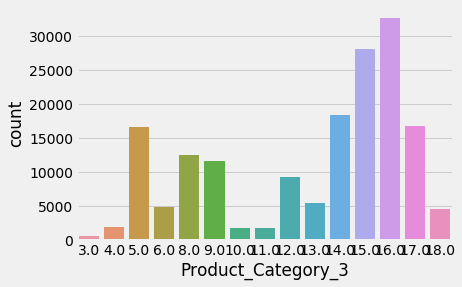

In [65]:
sns.countplot(df_raw.Product_Category_3)

In [89]:
corr = numerical_feats.corr()
print(corr['Purchase'].sort_values(ascending = False)[:10], '\n')
print(corr['Purchase'].sort_values(ascending = False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


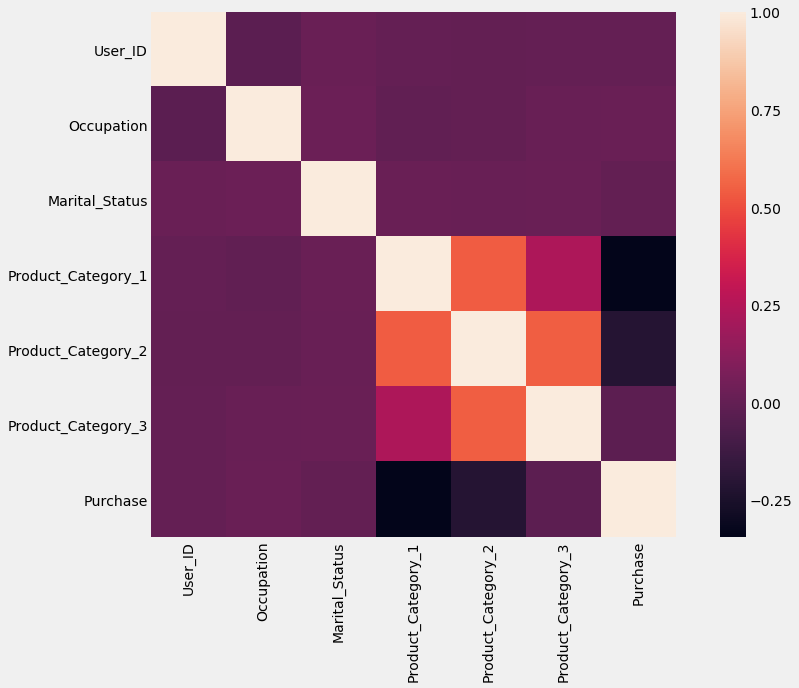

In [90]:
#correlation matrix.
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(corr,square= True)

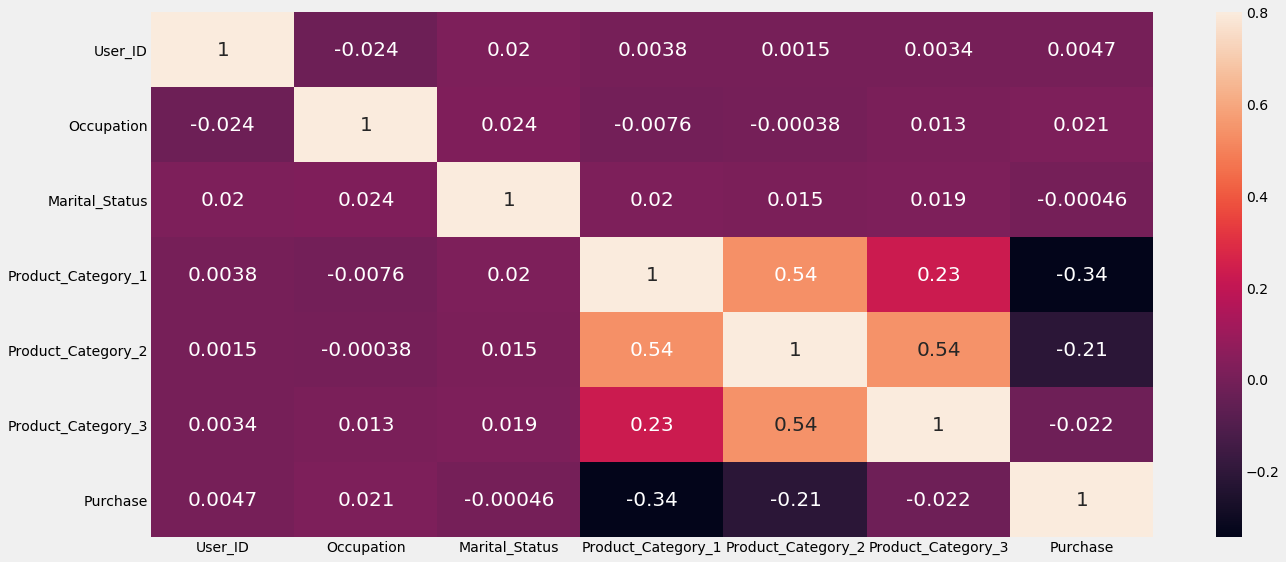

In [91]:
#correlation matrix.
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr, vmax =.8, annot_kws={'size':20}, annot = True);

In [92]:
s= corr.unstack(level=-1)
s

User_ID             User_ID               1.000000
                    Occupation           -0.023971
                    Marital_Status        0.020443
                    Product_Category_1    0.003825
                    Product_Category_2    0.001529
                    Product_Category_3    0.003419
                    Purchase              0.004716
Occupation          User_ID              -0.023971
                    Occupation            1.000000
                    Marital_Status        0.024280
                    Product_Category_1   -0.007618
                    Product_Category_2   -0.000384
                    Product_Category_3    0.013263
                    Purchase              0.020833
Marital_Status      User_ID               0.020443
                    Occupation            0.024280
                    Marital_Status        1.000000
                    Product_Category_1    0.019888
                    Product_Category_2    0.015138
                    Product_Cat

<b>1.1.3. Categorical Variables <br>
<b> 1.1.3.1. Distribution of the variable Gender

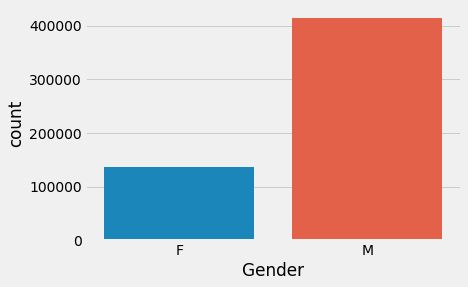

In [78]:
sns.countplot(df_raw.Gender)

<b>1.1.3.2. Distribution of the variable Age

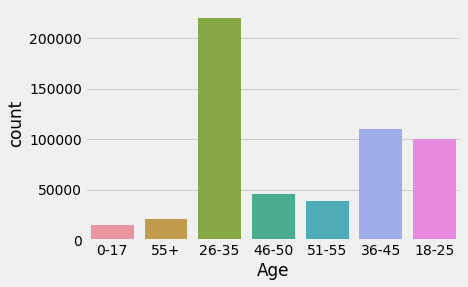

In [81]:
sns.countplot(df_raw.Age)

<b> 1.1.3.3. Distribution of the city_category

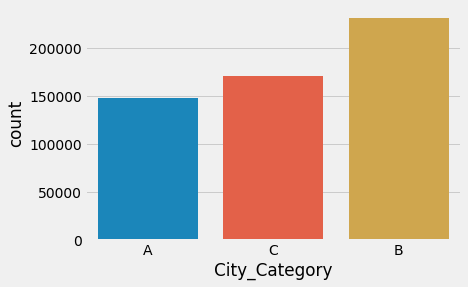

In [93]:
sns.countplot(df_raw.City_Category)

<b> 1.1.3.4. Distribution of the Stay_In_Current_City_Years

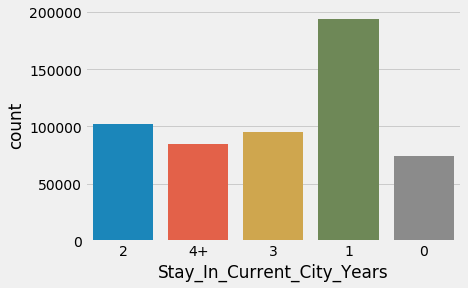

In [95]:
sns.countplot(df_raw.Stay_In_Current_City_Years)

# 1.2. Bivariate Distribution <br>
<li> 1.2.1. Numerical Variables <br> </li>
 <li>1.2.1.1. Occupation and Purchase Analysis </li>

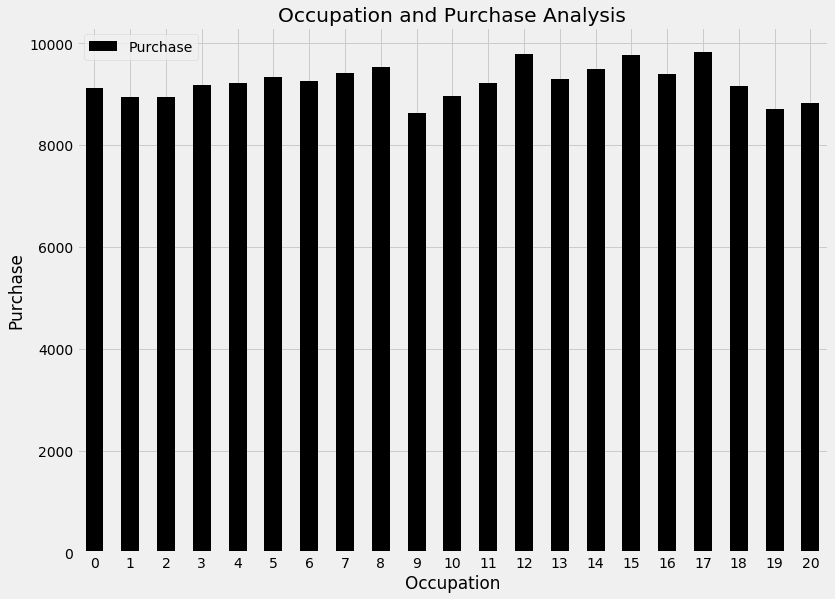

In [99]:
Occupation_pivot= \
# A pivot table allows you to extract the significance from a large, detailed data set.
df_raw.pivot_table(index='Occupation', values= "Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='black', figsize=(12,9))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

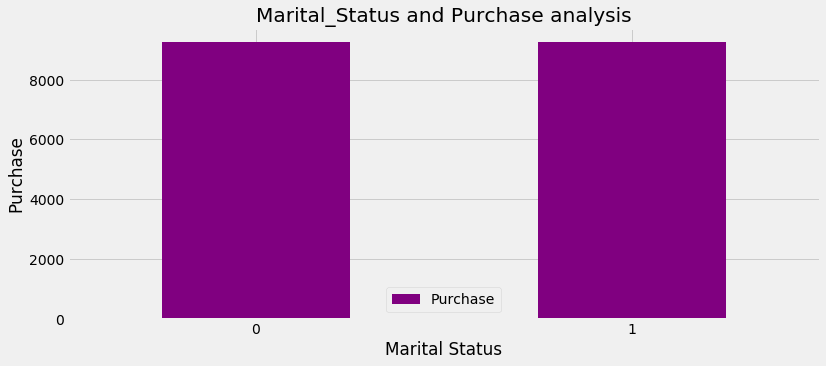

In [113]:
Marital_Status_pivot = \
df_raw.pivot_table(index= 'Marital_Status', values = "Purchase", aggfunc= np.mean)

Marital_Status_pivot.plot(kind= 'bar', color= 'purple', figsize=(12,5) )
plt.xlabel('Marital Status')
plt.ylabel('Purchase')
plt.title('Marital_Status and Purchase analysis')
plt.xticks(rotation=0)
plt.show;

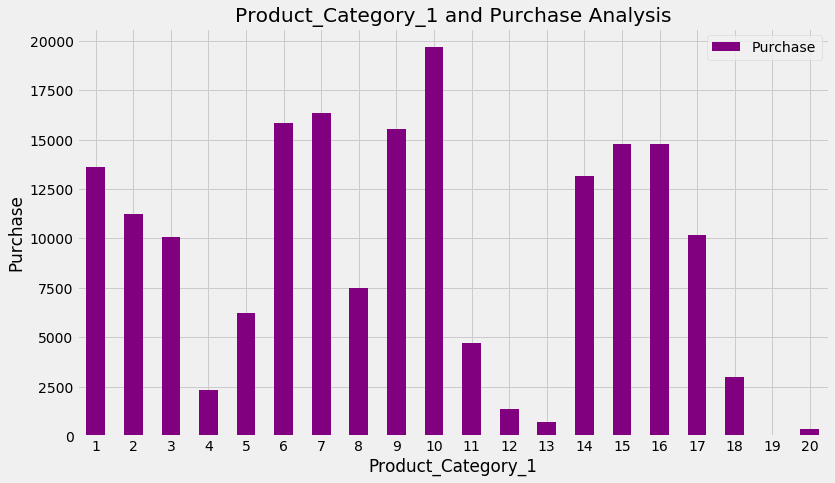

In [110]:
Product_category_1_pivot = \
df_raw.pivot_table(index='Product_Category_1', values= 'Purchase', aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

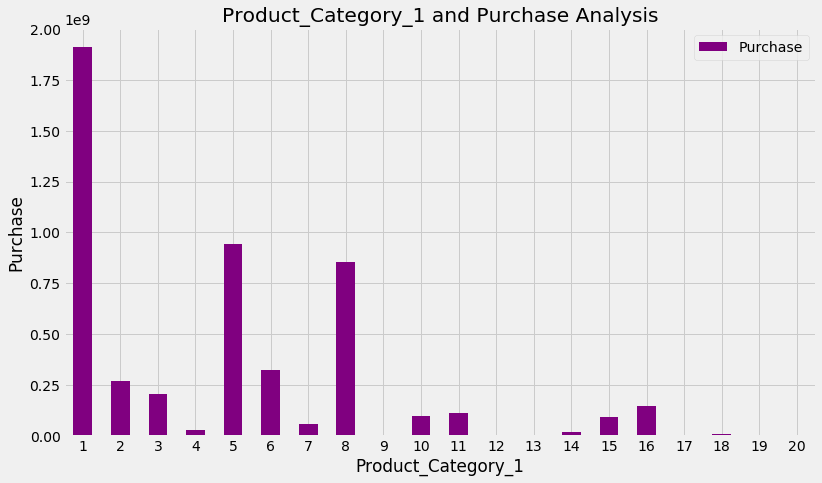

In [115]:
Product_category_1_pivot = \
df_raw.pivot_table(index='Product_Category_1', values= 'Purchase', aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

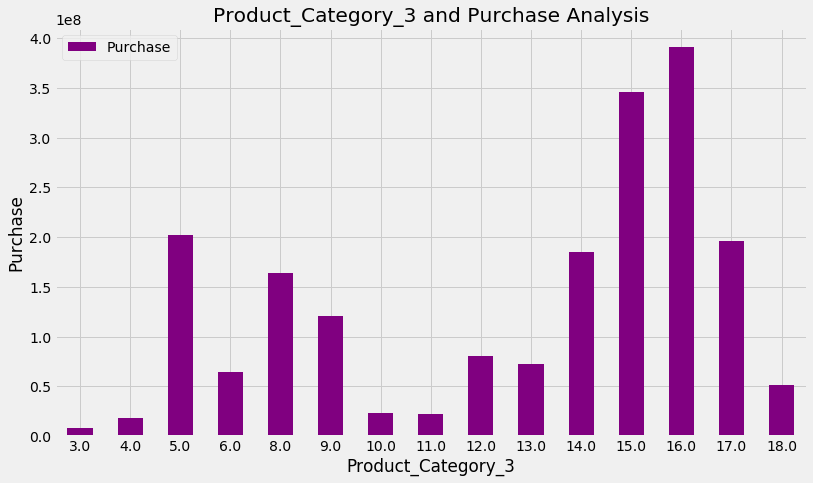

In [130]:
Product_category_3_pivot = \
df_raw.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)

Product_category_3_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

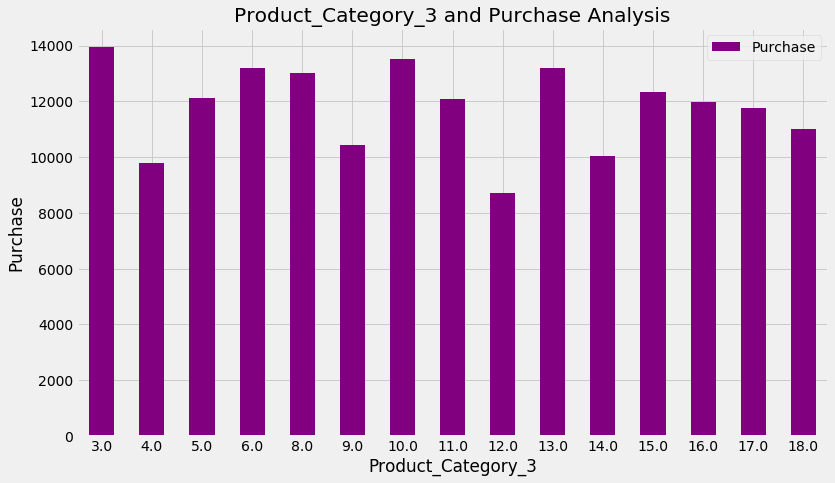

In [154]:
Product_category_3_pivot = \
df_raw.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)

Product_category_3_pivot.plot(kind='bar', color='purple',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

<b> 1.2.2. Categorical Variables <br>
1.2.2.1. Gender and Purchase Analysis

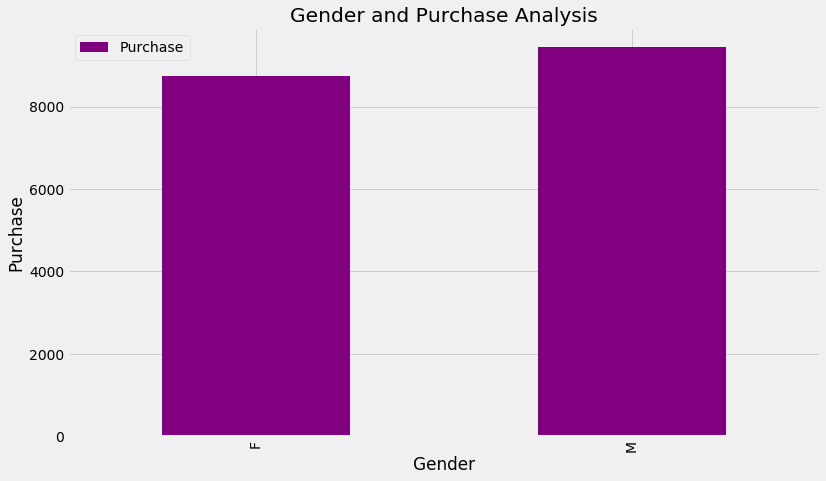

In [133]:
Gender_category_pivot = \
df_raw.pivot_table(index = 'Gender', values= 'Purchase', aggfunc=np.mean)

Gender_category_pivot.plot(kind='bar',color='purple', figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.show()

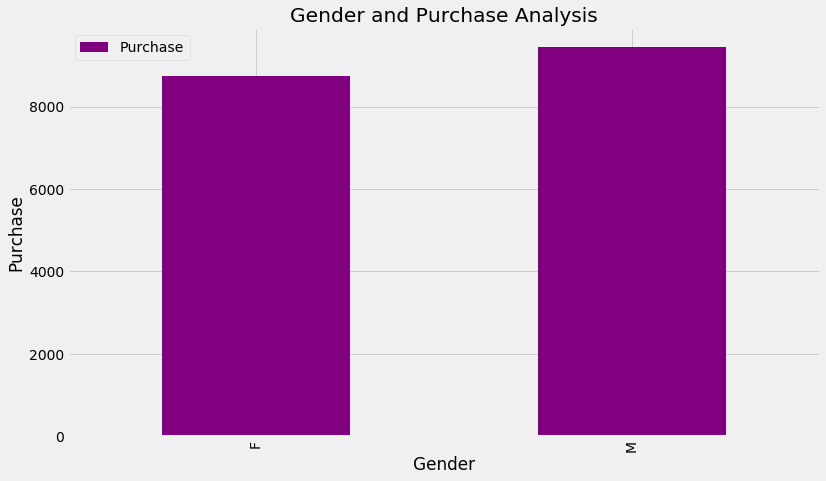

In [134]:
Gender_category_pivot = \
df_raw.pivot_table(index = 'Gender', values= 'Purchase', aggfunc=np.mean)

Gender_category_pivot.plot(kind='bar',color='purple', figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.show()

In [148]:
df_raw['Gender'].max() # Male has the maximum Values

'M'

# 2.1 Data Pre Procesing

In [155]:
df_raw['source']='train'
df_test['source']= 'test'

In [156]:
data = pd.concat([df_raw,df_test], ignore_index = True, sort = False)

print(df_raw.shape, df_test. shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [157]:
df_raw.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
source                             0
dtype: int64

In [168]:
data['Product_Category_2']= \
data['Product_Category_2'].fillna(-99).astype('float')

In [169]:
data.Product_Category_2.value_counts().sort_index()

-9999.0    245982
 2.0        70498
 3.0         4123
 4.0        36705
 5.0        37165
 6.0        23575
 7.0          854
 8.0        91317
 9.0         8177
 10.0        4420
 11.0       20230
 12.0        7801
 13.0       15054
 14.0       78834
 15.0       54114
 16.0       61687
 17.0       19104
 18.0        4027
Name: Product_Category_2, dtype: int64

In [170]:
data['Product_Category_3']= \
data['Product_Category_3'].fillna('None').astype('float')

In [171]:
data.Product_Category_3.value_counts().sort_index()

-9999.0    545809
 3.0          878
 4.0         2691
 5.0        23799
 6.0         6888
 8.0        17861
 9.0        16532
 10.0        2501
 11.0        2585
 12.0       13115
 13.0        7849
 14.0       26283
 15.0       39968
 16.0       46469
 17.0       23818
 18.0        6621
Name: Product_Category_3, dtype: int64

In [172]:
data.shape

(783667, 13)

In [181]:
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

In [185]:
category_cols = data.select_dtypes(include=['object'])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = data[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00294942       1
P00062242       1
P00203242       1
P00126342       1
P00091542       1
P00063442       1
P00062442       1
P00073342       1
P00104342       1
P00060842       1
P00068742       1
P00074742       1
P00353042       1
P00309642       1
P00308042       1
P00062542       1
P00063942       1
P00063642       1
P00092742       1
P00013042       1
P00022042       1
P00268942   

In [184]:

#Turn gender to binary
gender_dict = {'F':0, 'M':1}
df_raw["Gender"] = df_raw["Gender"].apply(lambda line: gender_dict[line])

df_raw["Gender"].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [186]:
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df_raw["Age"] = df_raw["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [187]:
city_dict = {'A':0, 'B':1, 'C':2}
df_raw["City_Category"] = df_raw["City_Category"].apply(lambda line: city_dict[line])

df_raw["City_Category"].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= data['Stay_In_Current_City_Years']

#New variable for outlet
y = le.fit_transform(y)
    
#Dummy Variables:
df_raw = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

df_raw.dtypes

User_ID                            int64
Product_ID                        object
Gender                             int64
Age                               object
Occupation                         int64
City_Category                     object
Marital_Status                     int64
Product_Category_1                 int64
Product_Category_2               float64
Product_Category_3               float64
Purchase                         float64
source                            object
Stay_In_Current_City_Years_0       uint8
Stay_In_Current_City_Years_1       uint8
Stay_In_Current_City_Years_2       uint8
Stay_In_Current_City_Years_3       uint8
Stay_In_Current_City_Years_4+      uint8
dtype: object